In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [11]:
# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
#import functions

In [12]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# pulls csv file from data folder to find the shape of the dataset

salaries = pd.read_csv("../data/ds_salaries.csv")
salaries.shape

(3755, 11)

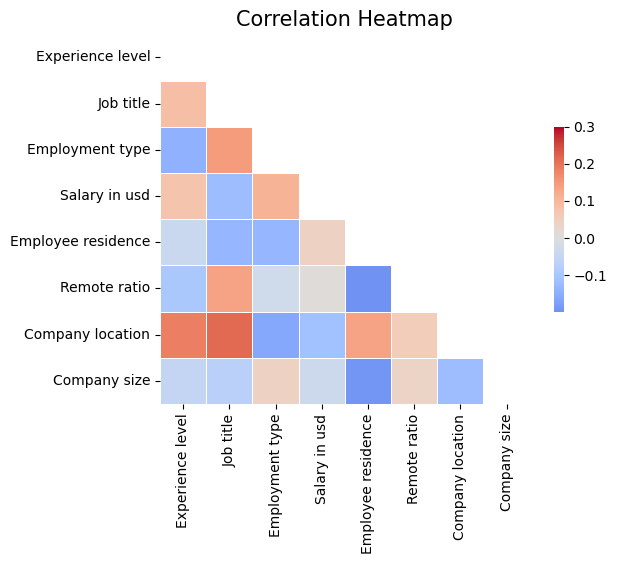

In [19]:
# Create a correlation heatmap to see if anything stands out
df = pd.DataFrame(np.random.random((100,8)), 
    columns=['experience_level',
             'job_title', 
             'employment_type',
             'salary_in_usd', 
             'employee_residence', 
             'remote_ratio',
             'company_location',
             'company_size'])

# Replace underscores with spaces in column names and capitalize them
df.columns = df.columns.str.replace('_', ' ').str.capitalize()

# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw a heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# title with fontsize 15
plt.title('Correlation Heatmap', fontsize = 15) 

plt.show()

In [15]:
# uses pulled dataset(ds) salaries to examine top 5 enteries on ds
#     to see column names and the data

salaries.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [16]:
#uses ds to examine 'job_title' column for top 20 jobs by count
top_job_titles = salaries['job_title'].value_counts().head(20).loc[::-1]
top_job_titles

Data Specialist                 14
Business Data Analyst           15
BI Data Analyst                 15
AI Scientist                    16
Computer Vision Engineer        18
Data Analytics Manager          22
Data Science Consultant         24
Machine Learning Scientist      26
Data Manager                    29
ML Engineer                     34
Research Engineer               37
Applied Scientist               58
Data Science Manager            58
Research Scientist              82
Data Architect                 101
Analytics Engineer             103
Machine Learning Engineer      289
Data Analyst                   612
Data Scientist                 840
Data Engineer                 1040
Name: job_title, dtype: int64

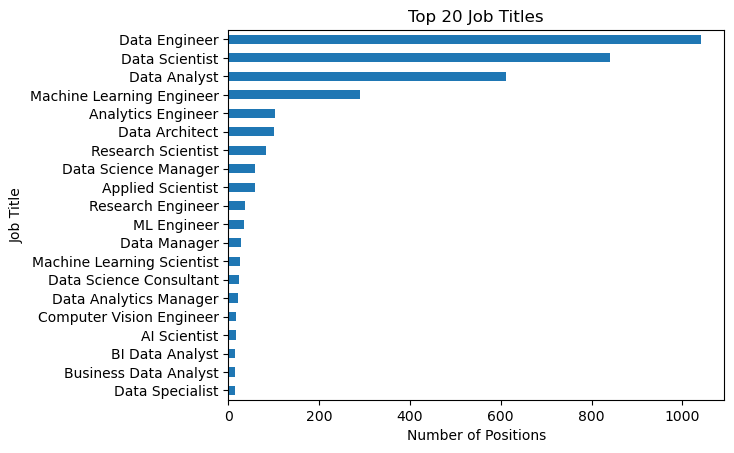

In [17]:
#horizontal bar plot of top_job_titles in decending order
top_job_titles.plot.barh()
# Add labels and title
plt.xlabel('Number of Positions')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles')

# Show the plot
plt.show()

In [9]:
#
top_salary_in_usd = salaries['salary_in_usd'].value_counts().head(10).loc[::1]
top_salary_in_usd

100000    99
150000    98
120000    91
160000    84
130000    82
200000    64
140000    63
135000    63
145000    54
175000    51
Name: salary_in_usd, dtype: int64

In [8]:
#The 20 top salaries in ascending order
top_salary_in_usd = salaries['salary_in_usd'].value_counts().head(20).loc[::-1]
top_salary_in_usd.shape

(20,)

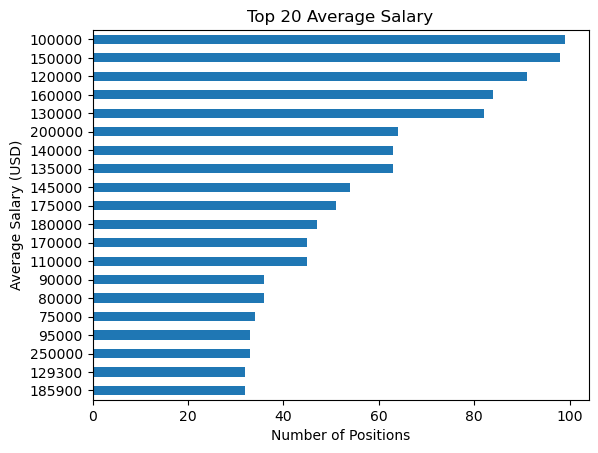

In [11]:
# hbar of top salaries. Need to arrange salaries in decending order, 
# keep x-axis as is
top_salary_in_usd.plot.barh()
# Add labels and title
plt.xlabel('Number of Positions')
plt.ylabel('Average Salary (USD)')
plt.title('Top 20 Average Salary')

# Show the plot
plt.show()

In [39]:
# group the data by job title and calculate the mean salary for each group
ave_salary_by_job = salaries.groupby('job_title')['salary'].mean().head(20).loc[::-1]
ave_salary_by_job = ave_salary_by_job.sort_values()

print(ave_salary_by_job)

job_title
Autonomous Vehicle Technician          26277.500000
AI Programmer                          55000.000000
BI Data Engineer                       60000.000000
Applied Machine Learning Engineer      97500.000000
Azure Data Engineer                   100000.000000
BI Analyst                            104888.888889
3D Computer Vision Researcher         120000.000000
Big Data Architect                    124999.500000
BI Developer                          129846.153846
AI Developer                          137181.818182
Analytics Engineer                    151352.621359
Business Intelligence Engineer        174150.000000
Applied Scientist                     190264.482759
Cloud Data Architect                  250000.000000
Business Data Analyst                 256200.000000
AI Scientist                          275312.500000
Applied Data Scientist                283200.000000
Applied Machine Learning Scientist    306233.333333
Big Data Engineer                     365909.090909
BI

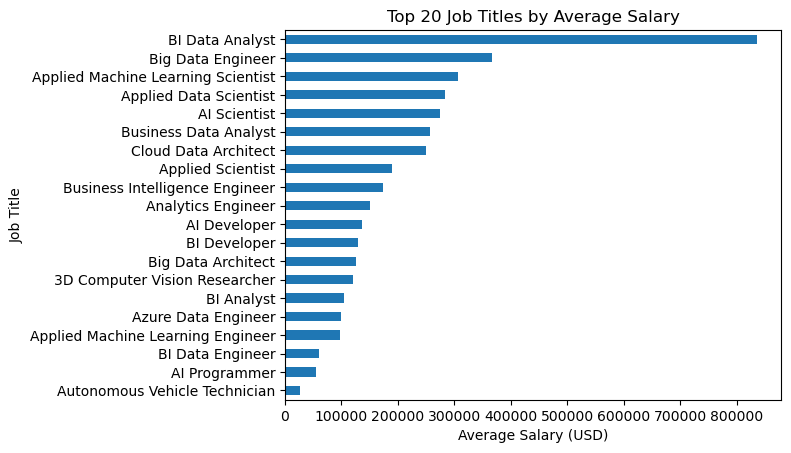

In [40]:
# top_salary_in_usd vs top_job_titles
ave_salary_by_job.plot.barh()

#Add Title and Labels to x axis and y axis
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles by Average Salary')

# Show the plot
plt.show()

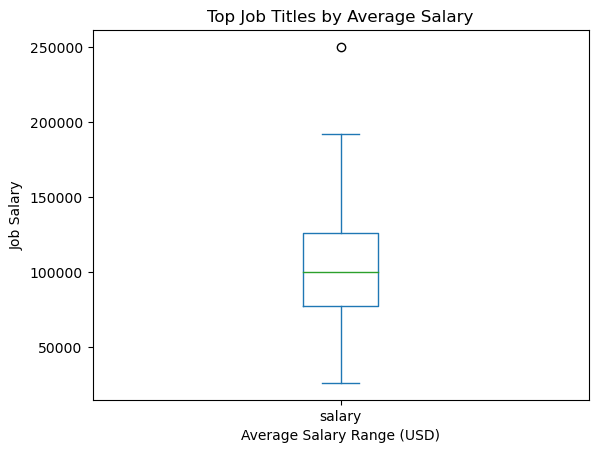

In [41]:
# Quick Box Plot to add perspective to prevoius data
#  to show outliers and true average range of salaries
all_ave_salary = salaries.groupby('job_title')['salary'].median().head(28).loc[::-1]
all_ave_salary.plot.box()
#Add Title and Labels to x axis and y axis
plt.xlabel('Average Salary Range (USD)')
plt.ylabel('Job Salary')
plt.title('Top Job Titles by Average Salary')
# Show the plot
plt.show()

experience_level
SE    148000.0
MI    100000.0
EX    200000.0
EN     80000.0
Name: salary, dtype: float64


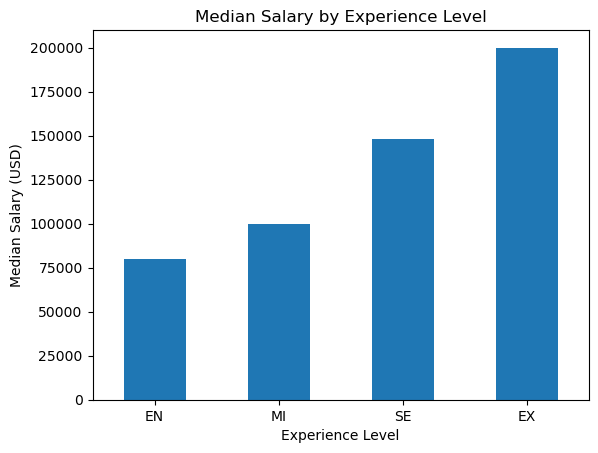

In [38]:
# group the data by experience_level and calculate the median salary for each group
ave_salary_by_job = salaries.groupby('experience_level')['salary'].median().head(20).loc[::-1]

print(ave_salary_by_job)

# sort the data in ascending order
ave_salary_by_job = ave_salary_by_job.sort_values()

# bar graph of top salaries. 
ax = ave_salary_by_job.plot.bar()

# Add labels and title
ax.set_xlabel('Experience Level')
ax.set_ylabel('Median Salary (USD)')
ax.set_title('Median Salary by Experience Level')

# Rotate the x-axis labels so they are horizontal instead of vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# Show a legend


# Show the plot
plt.show()